In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv("../../datasets/Iris.csv")
df = df.drop("Id", axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['Species'].value_counts()

Species
0    50
1    50
2    50
Name: count, dtype: int64

In [7]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [8]:
df = df.drop('SepalWidthCm' , axis = 1)

In [9]:
import plotly.express as px
fig = px.scatter_3d(df , x = 'SepalLengthCm' , y = 'PetalLengthCm' , z = 'PetalWidthCm' , color = 'Species')
fig.show()

In [11]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1 , 10):
    km = KMeans(n_clusters = i)
    km.fit(df)
    wcss.append(km.inertia_)

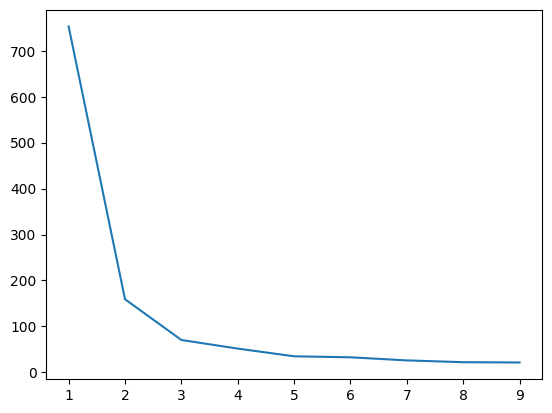

In [13]:
plt.plot(range(1,10) , wcss)

In [28]:
X = df.drop('Species' , axis = 1)
y = df['Species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [29]:
km = KMeans(n_clusters = 5)
km.fit(X)
y_pred = km.predict(X)
km.inertia_

31.662157142857144

In [30]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 0, 4, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4,
       0, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 4, 4,
       0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 3, 4, 2, 3, 3, 2, 0, 2, 3, 2,
       3, 3, 3, 4, 3, 3, 3, 2, 2, 4, 3, 4, 2, 4, 3, 2, 4, 4, 3, 2, 2, 2,
       3, 4, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4])

In [31]:
X.shape

(150, 3)

In [32]:
X[y_pred == 0].shape

(28, 3)

In [33]:
X

,SepalLengthCm,PetalLengthCm,PetalWidthCm
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
...,...,...,...
145,6.7,5.2,2.3
146,6.3,5.0,1.9
147,6.5,5.2,2.0
148,6.2,5.4,2.3


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X, 
    x='SepalLengthCm', 
    y='PetalLengthCm', 
    z='PetalWidthCm', 
    color=y_pred.astype(str) 
)

fig.show()
